# Supervised Learning

## Linear Regression

$$
y = aX + b
$$


Given a set of data points, we can fit a line to the data points. The line is represented by the equation $y = aX + b$. The goal is to find the values of $a$ and $b$ that best fit the data points.

The best fit is determined by **minimizing the sum of the squared differences between the actual data points and the predicted data points**. This is known as the **least squares method**.

### Least Squares Method Explanation

The **Least Squares Method** is used to find the line (or hyperplane, in a multivariate regression) that best fits the data by minimizing the sum of the squares of the residuals. A residual is the difference between the actual value and the predicted value. In linear regression, we aim to find the line that minimizes this difference across all data points.

For a simple linear regression, the equation for the line is:

$$
y = aX + b
$$

Where:

- $y$ is the predicted value of the target variable (e.g., house price),
- $X$ is the independent variable (e.g., square footage),
- $a$ is the slope of the line (how much $y$ changes for a unit increase in $X$),
- $b$ is the intercept (where the line crosses the y-axis).

The **Least Squares Method** finds the values of $a$ and $B$ that minimize the sum of squared residuals:

$$
\text{Residual} = \sum(y - \hat{y})^2
$$

Where:

$$
\hat{y} = aX + b
$$


Let's see how to implement linear regression using Python and Scikit-Learn.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 500)

#### Load the data

In [2]:
data = pd.read_csv('../data/ML_Houses_dataset.csv').sample(frac=1)

print('data.shape: ', data.shape)

data.head()

data.shape:  (1760, 85)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Pesos,WallMat,RoofSurface,ChimneyStyle,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1725,205,50,RM,50.0,3500,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,7,1947,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,TA,2200000.0,NaN,4367.0,?,TA,CBlock,TA,TA,No,LwQ,312,Unf,0,408,720,GasA,TA,Y,SBrkr,720,564,0,1284,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1948.0,Unf,1,240,TA,TA,Y,0,35,0,0,0,0,NaN,MnWw,NaN,0,4,2009,WD,Normal,110000
637,638,190,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,1.5Fin,5,4,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,1860000.0,NaN,3006.0,?,TA,CBlock,TA,TA,No,Unf,0,Unf,0,811,811,GasA,TA,Y,FuseA,811,576,0,1387,0,0,2,0,3,2,Gd,7,Typ,0,NaN,BuiltIn,1954.0,Unf,1,256,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,93000
1567,1215,85,RL,69.0,10205,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,5,5,1962,1962,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,2690000.0,NaN,765.0,?,TA,CBlock,TA,TA,Av,BLQ,784,Unf,0,141,925,GasA,TA,Y,SBrkr,999,0,0,999,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,300,TA,TA,Y,150,72,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500
1665,112,80,RL,NaN,7750,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,3600000.0,NaN,4591.0,?,TA,PConc,Gd,TA,No,GLQ,250,Unf,0,134,384,GasA,Ex,Y,SBrkr,774,656,0,1430,0,0,2,1,3,1,TA,7,Typ,1,TA,BuiltIn,2000.0,Fin,2,400,TA,TA,Y,180,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,180000
1607,1290,60,RL,86.0,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.0,Gd,5620000.0,NaN,2042.0,?,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1085,1085,GasA,Ex,Y,SBrkr,1120,850,0,1970,0,0,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.0,Fin,3,753,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial,281000


#### Visualize the data

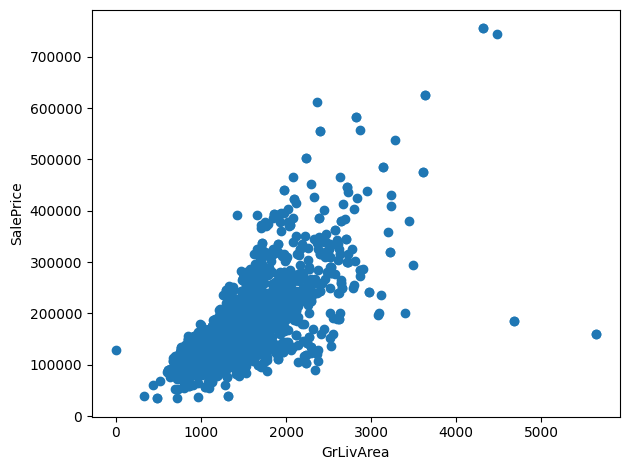

In [3]:
# Plotting GrLivArea vs SalePrice
plt.scatter(data['GrLivArea'], data['SalePrice'])

#Labels
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

plt.tight_layout()

#### Fitting the model with scikit-learn

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = data[['GrLivArea']]
y = data['SalePrice']

model.fit(X, y)

LinearRegression()

Let's actually see the line of best fit for a set of data points:

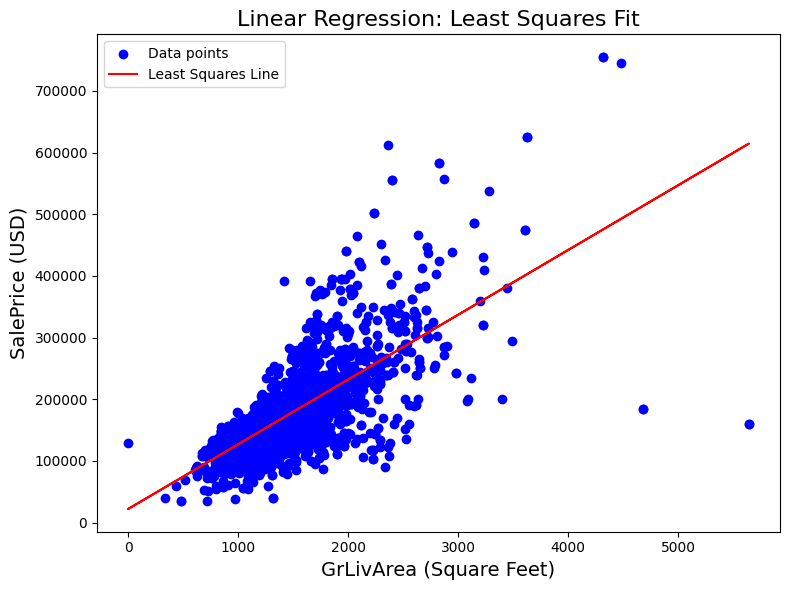

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression()
X = data[['GrLivArea']]
y = data['SalePrice']
model.fit(X, y)

# Predicted values
y_pred = model.predict(X)

# Plot the data points and the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Least Squares Line')

# Labels and Title
plt.xlabel('GrLivArea (Square Feet)', fontsize=14)
plt.ylabel('SalePrice (USD)', fontsize=14)
plt.title('Linear Regression: Least Squares Fit', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

#### Model Attributes

a (slope) and b (intercept) are stored as model attributes and can be accessed.

In [6]:
# View the model's slope (a)

model.coef_

array([105.00927564])

In [7]:
# View the model's intercept (b)

model.intercept_

np.float64(22104.121010020724)

#### Model Score

In [8]:
model.score(X, y)

0.48960426399689116

### Scoring

**Different models have different scoring methods**, which you can explore in the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score).

For **linear regression**, the most commonly used score is the **$R^2$ score** (coefficient of determination). It represents the proportion of the variance in the dependent variable that is explained by the independent variables. The $R^2$ score ranges from 0 to 1, where a higher value indicates a better model fit.

The R² score is calculated using the `score` method in Scikit-Learn, which internally evaluates the model's performance on test data.

#### Using the `predict` Method

After training a **Linear Regression** model, you can use the `predict` method to generate predictions on new data. 

This method takes input data (unseen data) and returns the predicted values for the target variable based on the model's learned parameters.


</br>
Let's input some surface area value and predict the price of a house with that characteristic:

In [9]:
# Predicting
new_data = pd.DataFrame({'GrLivArea': [2000]})
model.predict(new_data)

array([232122.6722812])

An apartment with a **surface area** of **$2000 ft^2$** has a predicted value of about **USD 232K**.

### Generalization in Machine Learning

**Generalization** refers to the ability of a machine learning model to perform well on unseen data. A well-generalized model captures the underlying patterns in the training data while avoiding noise and irrelevant details.

#### Key Concepts:
- **Underfitting (High Bias):**  
  Occurs when a model is too simple and fails to capture important patterns in the data. Underfitting leads to poor performance on both training and test data.
  
- **Overfitting (High Variance):**  
  Happens when a model is too complex and learns not only the underlying patterns but also the noise in the training data. Overfitting results in excellent performance on training data but poor performance on unseen test data.
  
- **Bias-Variance Tradeoff:**  
  There is a tradeoff between bias and variance. A model should find a balance between underfitting and overfitting in order to generalize well to unseen data.


#### a. The Holdout Method

One way to evaluate a model’s generalization performance is by splitting the dataset into two sets: a **training set** and a **test set**. This is called the **Holdout Method**.

- The model is trained on the training set and evaluated on the test set.
- The performance on the test set gives an estimate of how well the model will generalize to new, unseen data.

In [10]:
X = data[['GrLivArea']] # Train data
y = data['SalePrice'] # Target variable

In [11]:
X # pandas DataFrame

,GrLivArea
1725,1284
637,1387
1567,999
1665,1430
1607,1970
...,...
1500,1536
498,899
264,764
699,1391


In [12]:
y # pandas Series (1D array)

1725    110000
637      93000
1567    134500
1665    180000
1607    281000
         ...  
1500    214000
498     130000
264      73000
699     196000
1528    193879
Name: SalePrice, Length: 1760, dtype: int64

In [13]:
y.isin(X).any() # Check if y contains any of the values in X

np.False_

##### Train and Test sets

<img src="../assets/img/train-test-set.png" alt="train-test-set" width="500"/>


- **Training set** (70%): Used to train the model.
- **Testing set** (30%): Used to evaluate the model's performance on unseen data.

In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Training data
X_train = train_data[['GrLivArea']]
y_train = train_data['SalePrice']

# Testing data
X_test = test_data[['GrLivArea']]
y_test = test_data['SalePrice']

In [15]:
#  NOTE: You could also use a more direct alternative to split the data:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
# Training and Scoring the model

# Instantiate the model
model = LinearRegression()

# Train the model on the Train data
model.fit(X_train, y_train)

# Score the model on the Test data
model.score(X_test, y_test)

0.4833075773951737

With the Holdout method, we were able to improve our model from an R² of aprox. %48   to 54%, an **improvement of 7%** in R².

#### b. Cross Validation

#### Example of Generalization Using Cross-Validation:
To measure how well a model generalizes, we can use techniques like **cross-validation**. Cross-validation splits the dataset into multiple parts (folds), trains the model on some parts, and tests it on others, providing a more robust evaluation of generalization performance.

In [17]:
from sklearn.model_selection import cross_validate

# Instantiate the model
model = LinearRegression()

# 5-Fold Cross-validate the model
cv_results = cross_validate(model, X, y, cv=5)

# Scores
cv_results['test_score'].mean()

np.float64(0.4570407910058741)

#### Choosing the Number of Folds

<details>
    <summary>Click to expand!</summary>

The number of folds **(k)** in cross-validation is a *hyperparameter* that can be tuned to improve the model's performance. 

**A higher ***k*** value results in a more robust estimate of the model's generalization performance but requires more computational resources.**

Rule of thumb: k = 5 or 10.



### Bias-Variance Tradeoff

When building machine learning models, it's essential to strike a balance between **bias** and **variance**:

- **Bias**: Error due to overly simplistic assumptions in the model. A model with high bias tends to underfit the data, meaning it does not capture the underlying patterns well.
- **Variance**: Error due to excessive complexity in the model. A model with high variance tends to overfit the data, capturing noise and irrelevant details.

The tradeoff between bias and variance is crucial in achieving good generalization performance on unseen data. The goal is to find a model that minimizes both.

<img src="../assets/img/over-underfitting.png" alt="over-underfitting" width="800"/>

**How to Handle Bias and Variance:**
- High bias (underfitting) can be addressed by i**ncreasing model complexity** (choosing a more robust model) or **adding more relevant features**.
- High variance (overfitting) can be controlled using **regularization** techniques (such as **Ridge** or **Lasso regression**), **reducing the number of features**, or **gathering more data**.

To visualize how this works, we often use **learning curves** to see the performance of the model on both the training and validation sets.



### Learning Curves

#### 1. Introduction to Learning Curves
Learning curves are a valuable tool to understand the performance of a machine learning model by plotting training and validation scores as a function of the training size.

- **Training Score**: Measures the model’s performance on the training data.
- **Validation Score**: Measures the model’s performance on unseen data (validation set).

#### 2. Purpose of Learning Curves
Learning curves help identify:
- **Underfitting**: Low training and validation scores, indicating the model is too simple.
- **Overfitting**: High training score but low validation score, suggesting the model is too complex.
- **Well-Fitting Model**: Training and validation scores converge at a high value, indicating the model generalizes well.

</br>
Let's see how it works:

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

In [19]:

import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Define training sizes
train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(),
    X=X,
    y=y,
    train_sizes=train_sizes,
    cv=5
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
print(r'Train scores means: ', train_scores_mean)

print('\n')

test_scores_mean = np.mean(test_scores, axis=1)
print(r'Test scores means : ', test_scores_mean)

Train scores means:  [0.40622225 0.58305125 0.56100403 0.58760765 0.6158419  0.55692505
 0.56238902 0.5438075  0.52013014]


Test scores means :  [0.44188907 0.46992558 0.46937447 0.46801434 0.4645192  0.46053578
 0.45187919 0.43779956 0.44480911]


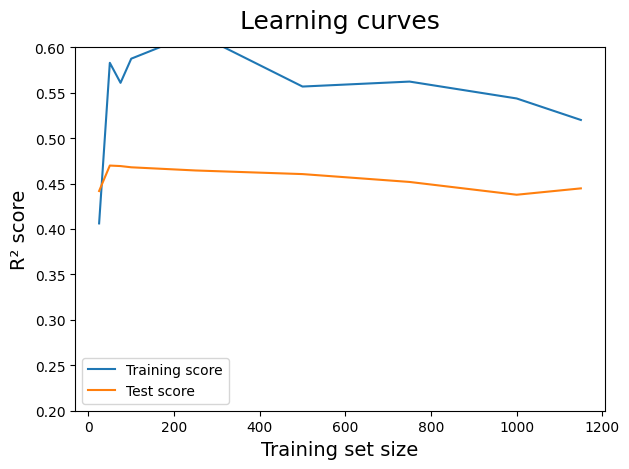

In [20]:
# Plotting the learning curves

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.ylabel('R² score', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves', fontsize=18, y=1.03)
plt.legend()

# Set y-axis limit to range from 0 to 1
plt.ylim(.2, .6)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

#### Interpretation of Learning Curves:

- **Underfitting**: If both training and validation scores are low and converge, the model may be too simple (underfitting).
- **Overfitting**: If the training score is much higher than the validation score, the model may be too complex (overfitting).
- **Ideal Case**: If the training and validation scores converge at a high value, the model generalizes well.

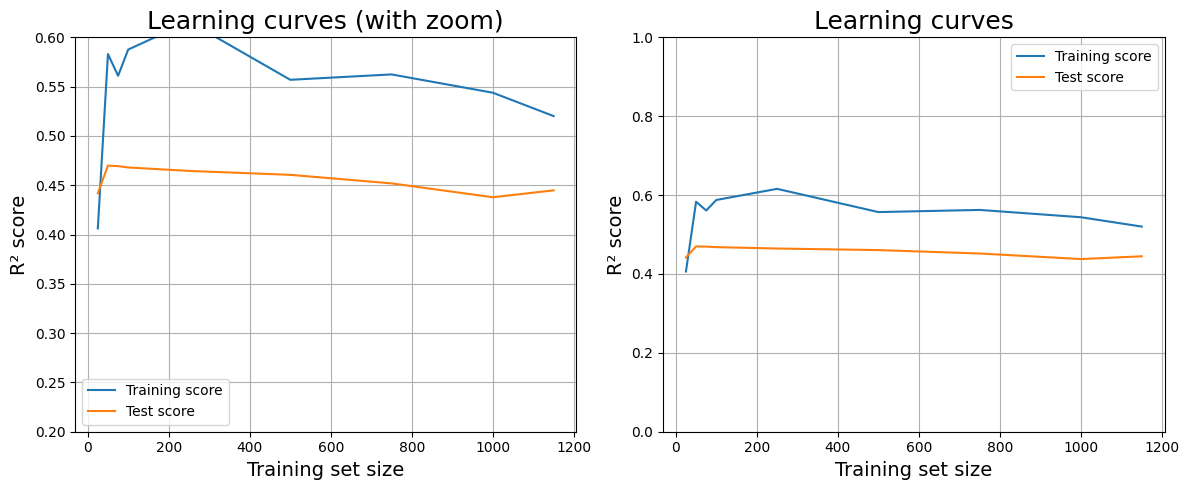

In [21]:
# Create a figure with two subplots: one for the full range and one for the zoomed-in view
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Full range (0 to 1)
ax[0].plot(train_sizes, train_scores_mean, label='Training score')
ax[0].plot(train_sizes, test_scores_mean, label='Test score')
ax[0].set_ylabel('R² score', fontsize=14)
ax[0].set_xlabel('Training set size', fontsize=14)
ax[0].set_title('Learning curves (with zoom)', fontsize=18)
ax[0].set_ylim(0.2, 0.6)  # Set y-axis from 0 to 1
ax[0].legend()
ax[0].grid(True)

# Plot 2: Zoomed-in version
ax[1].plot(train_sizes, train_scores_mean, label='Training score')
ax[1].plot(train_sizes, test_scores_mean, label='Test score')
ax[1].set_ylabel('R² score', fontsize=14)
ax[1].set_xlabel('Training set size', fontsize=14)
ax[1].set_title('Learning curves', fontsize=18)
ax[1].set_ylim(0, 1)  # Zoom into the range from 0.7 to 1 for better detail
ax[1].legend()
ax[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

## Sklearn Modeling Flow

1. **Import the Model:**  
   Import the machine learning model from Scikit-Learn.  
   `from sklearn.linear_model import LinearRegression`

2. **Instantiate the Model:**  
   Create an instance of the model.  
   `model = LinearRegression()`

3. **Train the Model:**  
   Train the model using the training data (`X_train`, `y_train`).  
   `model.fit(X_train, y_train)`

4. **Make Predictions:**  
   Use the trained model to make predictions on unseen data (`X_test`).  
   `y_pred = model.predict(X_test)`

5. **Evaluate the Model:**  
   Assess the model's performance using the R² score.  
   `score = model.score(X_test, y_test)`  
   `print(f"R² score: {score:.2f}")`

6. **Cross-Validation:**  
   Validate the model using k-fold cross-validation.  
   `from sklearn.model_selection import cross_val_score`  
   `cv_scores = cross_val_score(model, X, y, cv=5)`  
   `print(f"Mean CV score: {cv_scores.mean():.2f}")`

This flow outlines the basic steps for building, training, predicting, evaluating, and validating a model using Scikit-Learn.

## Exercices